In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
from matplotlib import pyplot as plt


# Data Acquisition

In [95]:
Diabetes_Prediction = pd.read_excel(r"C:\Users\19402\Downloads\CardiacPrediction.xlsx")

In [96]:
Diabetes_Prediction.head()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.40,174.00,...,5.56,1.39,4.70,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.50,178.30,...,7.21,1.08,5.50,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.20,180.00,...,4.03,0.98,5.20,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.60,157.70,...,8.12,1.28,7.60,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.50,166.20,...,4.50,1.04,5.80,1,1,1,2,2,2,0


In [97]:
Diabetes_Prediction.shape

(37079, 51)

In [98]:
Diabetes_Prediction.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [99]:
pd.options.display.float_format = '{:,.2f}'.format
Diabetes_Prediction.corr()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
SEQN,1.00,-0.00,0.00,0.18,-0.04,0.01,-0.03,-0.03,0.05,-0.02,...,-0.12,0.02,0.09,0.05,0.06,-0.00,-0.03,0.05,0.18,-0.00
Gender,-0.00,1.00,-0.03,-0.04,-0.05,0.15,-0.09,-0.12,-0.27,-0.67,...,0.07,0.31,-0.04,0.15,0.06,-0.05,0.01,-0.05,-0.04,-0.08
Age,0.00,-0.03,1.00,-0.04,0.05,-0.15,0.47,-0.04,-0.04,-0.14,...,0.11,0.05,0.28,0.21,0.12,-0.24,-0.19,-0.00,0.02,0.22
Annual-Family-Income,0.18,-0.04,-0.04,1.00,0.87,-0.06,-0.10,0.06,0.05,0.15,...,0.01,0.07,-0.07,-0.05,-0.07,-0.22,0.06,0.05,0.07,-0.04
Ratio-Family-Income-Poverty,-0.04,-0.05,0.05,0.87,1.00,-0.08,-0.04,0.06,0.04,0.18,...,0.04,0.10,-0.08,-0.08,-0.11,-0.28,0.06,0.03,0.02,-0.01
X60-sec-pulse,0.01,0.15,-0.15,-0.06,-0.08,1.00,-0.07,0.07,0.08,-0.07,...,0.07,-0.01,0.07,0.06,0.03,0.03,-0.05,-0.04,-0.03,-0.07
Systolic,-0.03,-0.09,0.47,-0.10,-0.04,-0.07,1.00,0.29,0.09,-0.04,...,0.12,-0.01,0.19,0.08,0.05,-0.07,-0.11,-0.02,-0.02,0.08
Diastolic,-0.03,-0.12,-0.04,0.06,0.06,0.07,0.29,1.00,0.16,0.14,...,0.13,-0.06,0.01,-0.05,-0.02,0.02,0.05,-0.02,-0.03,-0.06
Weight,0.05,-0.27,-0.04,0.05,0.04,0.08,0.09,0.16,1.00,0.45,...,-0.02,-0.33,0.16,-0.04,-0.03,-0.03,-0.10,-0.11,-0.04,0.03
Height,-0.02,-0.67,-0.14,0.15,0.18,-0.07,-0.04,0.14,0.45,1.00,...,-0.09,-0.19,-0.05,-0.17,-0.12,-0.02,0.03,0.03,0.01,0.02


In [100]:
Diabetes_Prediction_data=Diabetes_Prediction.drop(['SEQN','Annual-Family-Income','Ratio-Family-Income-Poverty', 'Red-Cell-Distribution-Width', 'Vigorous-work', 'Moderate-work', 'Health-Insurance','Blood-Rel-Stroke','Height','Mean-cell-Hemoglobin', 'Mean-Platelet-Vol','CoronaryHeartDisease',
       'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width', 'Cholesterol'], axis = 1)


# Data Analysis

In [101]:
Diabetes_Prediction_data.columns

Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte', 'Monocyte',
       'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Albumin', 'ALP', 'AST', 'ALT', 'Creatinine',
       'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein',
       'Uric.Acid', 'Triglycerides', 'Total-Cholesterol', 'HDL',
       'Glycohemoglobin', 'Diabetes', 'Blood-Rel-Diabetes'],
      dtype='object')

In [102]:
Diabetes_Prediction_data.shape

(37079, 34)

In [103]:
Diabetes_Prediction_data['Diabetes'].value_counts()

2    32227
1     4144
3      708
Name: Diabetes, dtype: int64

In [104]:
Diabetes_Prediction_data['Diabetes'].loc[(Diabetes_Prediction_data['Diabetes'] == 3 )] = 1

C:\Users\19402\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [105]:
Diabetes_Prediction_data['Diabetes'].value_counts()

2    32227
1     4852
Name: Diabetes, dtype: int64

In [106]:
Diabetes_Prediction_data = Diabetes_Prediction_data[['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte', 'Monocyte',
       'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Albumin', 'ALP', 'AST', 'ALT', 'Creatinine',
       'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein',
       'Uric.Acid', 'Triglycerides', 'Total-Cholesterol', 'HDL',
       'Glycohemoglobin', 'Blood-Rel-Diabetes', 'Diabetes']]
Diabetes_Prediction_data.columns

Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte', 'Monocyte',
       'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Albumin', 'ALP', 'AST', 'ALT', 'Creatinine',
       'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein',
       'Uric.Acid', 'Triglycerides', 'Total-Cholesterol', 'HDL',
       'Glycohemoglobin', 'Blood-Rel-Diabetes', 'Diabetes'],
      dtype='object')

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

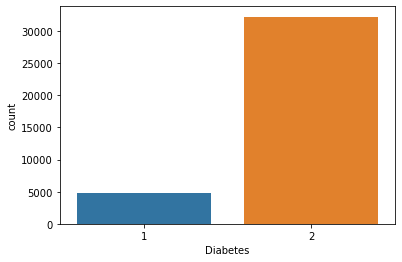

In [107]:
import seaborn as sns
sns.countplot(x='Diabetes', data=Diabetes_Prediction_data)

# Finding Missing values

In [108]:
Diabetes_Prediction_data.isnull().sum()

Gender                0
Age                   0
X60-sec-pulse         0
Systolic              0
Diastolic             0
Weight                0
Body-Mass-Index       0
White-Blood-Cells     0
Lymphocyte            0
Monocyte              0
Eosinophils           0
Basophils             0
Red-Blood-Cells       0
Hemoglobin            0
Platelet-count        0
Albumin               0
ALP                   0
AST                   0
ALT                   0
Creatinine            0
Glucose               0
GGT                   0
Iron                  0
LDH                   0
Phosphorus            0
Bilirubin             0
Protein               0
Uric.Acid             0
Triglycerides         0
Total-Cholesterol     0
HDL                   0
Glycohemoglobin       0
Blood-Rel-Diabetes    0
Diabetes              0
dtype: int64

In [109]:
Diabetes_Prediction_data.describe()

,Gender,Age,X60-sec-pulse,Systolic,Diastolic,Weight,Body-Mass-Index,White-Blood-Cells,Lymphocyte,Monocyte,...,Phosphorus,Bilirubin,Protein,Uric.Acid,Triglycerides,Total-Cholesterol,HDL,Glycohemoglobin,Blood-Rel-Diabetes,Diabetes
count,"37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00",...,"37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00","37,079.00"
mean,1.51,48.94,72.58,124.09,69.92,80.99,28.82,7.27,30.23,7.92,...,1.20,11.80,72.05,321.72,1.70,5.08,1.37,5.68,1.55,1.87
std,0.50,18.01,12.24,19.25,13.58,20.68,6.61,2.48,8.59,2.32,...,0.18,5.28,4.97,86.13,1.28,1.07,0.42,1.05,0.50,0.34
min,1.00,20.00,32.00,0.00,0.00,32.30,13.18,1.40,2.70,0.60,...,0.48,0.00,47.00,23.80,0.10,1.53,0.16,2.00,1.00,1.00
25%,1.00,33.00,64.00,111.00,62.00,66.50,24.22,5.70,24.40,6.40,...,1.10,8.55,69.00,261.70,0.90,4.32,1.07,5.20,1.00,2.00
50%,2.00,48.00,72.00,121.00,70.00,78.20,27.80,6.90,29.70,7.70,...,1.20,10.26,72.00,315.20,1.34,5.02,1.29,5.40,2.00,2.00
75%,2.00,63.00,80.00,134.00,78.00,92.10,32.10,8.40,35.50,9.10,...,1.32,13.68,75.00,374.70,2.07,5.74,1.60,5.80,2.00,2.00
max,2.00,85.00,224.00,270.00,132.00,371.00,130.21,117.20,94.50,66.90,...,2.65,224.01,113.00,"1,070.60",34.56,14.09,5.84,18.80,2.00,2.00


# Correlation of the variables

<AxesSubplot:>

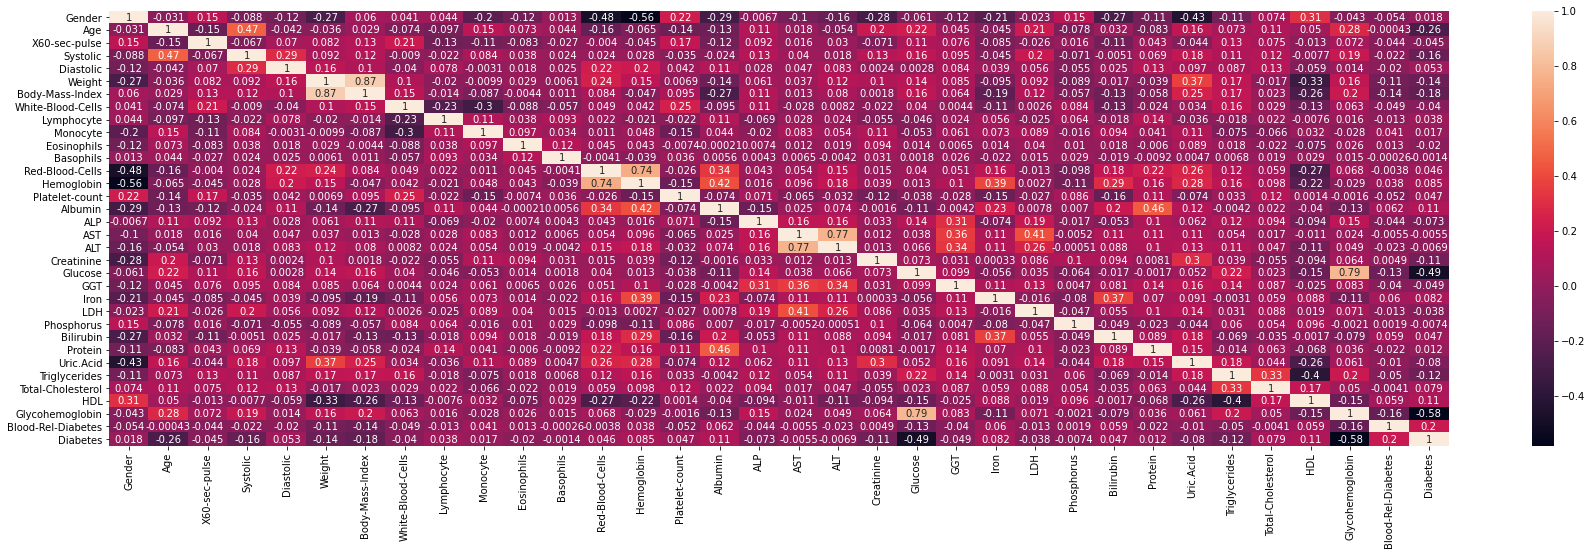

In [123]:
plt.subplots(figsize=(30,8))
sns.heatmap(Diabetes_Prediction_data.corr(),annot=True )

In [111]:
pd.options.display.float_format = '{:,.2f}'.format
Diabetes_Prediction_data.corr()

,Gender,Age,X60-sec-pulse,Systolic,Diastolic,Weight,Body-Mass-Index,White-Blood-Cells,Lymphocyte,Monocyte,...,Phosphorus,Bilirubin,Protein,Uric.Acid,Triglycerides,Total-Cholesterol,HDL,Glycohemoglobin,Blood-Rel-Diabetes,Diabetes
Gender,1.00,-0.03,0.15,-0.09,-0.12,-0.27,0.06,0.04,0.04,-0.20,...,0.15,-0.27,-0.11,-0.43,-0.11,0.07,0.31,-0.04,-0.05,0.02
Age,-0.03,1.00,-0.15,0.47,-0.04,-0.04,0.03,-0.07,-0.10,0.15,...,-0.08,0.03,-0.08,0.16,0.07,0.11,0.05,0.28,-0.00,-0.26
X60-sec-pulse,0.15,-0.15,1.00,-0.07,0.07,0.08,0.13,0.21,-0.13,-0.11,...,0.02,-0.11,0.04,-0.04,0.13,0.07,-0.01,0.07,-0.04,-0.04
Systolic,-0.09,0.47,-0.07,1.00,0.29,0.09,0.12,-0.01,-0.02,0.08,...,-0.07,-0.01,0.07,0.18,0.11,0.12,-0.01,0.19,-0.02,-0.16
Diastolic,-0.12,-0.04,0.07,0.29,1.00,0.16,0.10,-0.04,0.08,-0.00,...,-0.05,0.02,0.13,0.10,0.09,0.13,-0.06,0.01,-0.02,0.05
Weight,-0.27,-0.04,0.08,0.09,0.16,1.00,0.87,0.10,-0.02,-0.01,...,-0.09,-0.02,-0.04,0.37,0.17,-0.02,-0.33,0.16,-0.11,-0.14
Body-Mass-Index,0.06,0.03,0.13,0.12,0.10,0.87,1.00,0.15,-0.01,-0.09,...,-0.06,-0.13,-0.06,0.25,0.17,0.02,-0.26,0.20,-0.14,-0.18
White-Blood-Cells,0.04,-0.07,0.21,-0.01,-0.04,0.10,0.15,1.00,-0.23,-0.30,...,0.08,-0.13,-0.02,0.03,0.16,0.03,-0.13,0.06,-0.05,-0.04
Lymphocyte,0.04,-0.10,-0.13,-0.02,0.08,-0.02,-0.01,-0.23,1.00,0.11,...,0.06,-0.02,0.14,-0.04,-0.02,0.02,-0.01,0.02,-0.01,0.04
Monocyte,-0.20,0.15,-0.11,0.08,-0.00,-0.01,-0.09,-0.30,0.11,1.00,...,-0.02,0.09,0.04,0.11,-0.08,-0.07,0.03,-0.03,0.04,0.02


# Data Preprocessing

# Dealing with Outliers

In [126]:

X = Diabetes_Prediction_data.iloc[:, :-1]
Y=Diabetes_Prediction_data["Diabetes"].values
X.columns

Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte', 'Monocyte',
       'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Albumin', 'ALP', 'AST', 'ALT', 'Creatinine',
       'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein',
       'Uric.Acid', 'Triglycerides', 'Total-Cholesterol', 'HDL',
       'Glycohemoglobin', 'Blood-Rel-Diabetes'],
      dtype='object')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 [Text(1, 0, 'Gender'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'X60-sec-pulse'),
  Text(4, 0, 'Systolic'),
  Text(5, 0, 'Diastolic'),
  Text(6, 0, 'Weight'),
  Text(7, 0, 'Body-Mass-Index'),
  Text(8, 0, 'White-Blood-Cells'),
  Text(9, 0, 'Lymphocyte'),
  Text(10, 0, 'Monocyte'),
  Text(11, 0, 'Eosinophils'),
  Text(12, 0, 'Basophils'),
  Text(13, 0, 'Red-Blood-Cells'),
  Text(14, 0, 'Hemoglobin'),
  Text(15, 0, 'Platelet-count'),
  Text(16, 0, 'Albumin'),
  Text(17, 0, 'ALP'),
  Text(18, 0, 'AST'),
  Text(19, 0, 'ALT'),
  Text(20, 0, 'Creatinine'),
  Text(21, 0, 'Glucose'),
  Text(22, 0, 'GGT'),
  Text(23, 0, 'Iron'),
  Text(24, 0, 'LDH'),
  Text(25, 0, 'Phosphorus'),
  Text(26, 0, 'Bilirubin'),
  Text(27, 0, 'Protein'),
  Text(28, 0, 'Uric.Acid'),
  Text(29, 0, 'Triglycerides'),
  Text(30, 0, 'Total-Cholesterol'),
  Text(31, 0, 'HDL'),
 

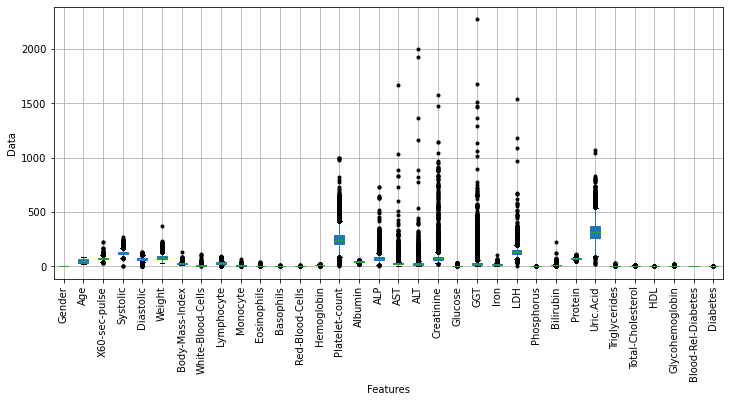

In [127]:
plt.subplots(figsize=(12,5))
Diabetes_Prediction_data.boxplot(patch_artist=True, sym='k.')
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

# Detecting Outliers

In [128]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [129]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], " - Contains Outlier")

X60-sec-pulse  - Contains Outlier
Systolic  - Contains Outlier
Diastolic  - Contains Outlier
Weight  - Contains Outlier
Body-Mass-Index  - Contains Outlier
White-Blood-Cells  - Contains Outlier
Lymphocyte  - Contains Outlier
Monocyte  - Contains Outlier
Eosinophils  - Contains Outlier
Basophils  - Contains Outlier
Red-Blood-Cells  - Contains Outlier
Hemoglobin  - Contains Outlier
Platelet-count  - Contains Outlier
Albumin  - Contains Outlier
ALP  - Contains Outlier
AST  - Contains Outlier
ALT  - Contains Outlier
Creatinine  - Contains Outlier
Glucose  - Contains Outlier
GGT  - Contains Outlier
Iron  - Contains Outlier
LDH  - Contains Outlier
Phosphorus  - Contains Outlier
Bilirubin  - Contains Outlier
Protein  - Contains Outlier
Uric.Acid  - Contains Outlier
Triglycerides  - Contains Outlier
Total-Cholesterol  - Contains Outlier
HDL  - Contains Outlier
Glycohemoglobin  - Contains Outlier


# Replacing Outliers

In [130]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    mean = X[feature].mean()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the mean value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = mean 
    X.loc[X[feature] > maximum, feature] = mean

# taking all the columns except the last one
# last column is the label


for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [131]:
for i in range (50):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(1, 0, 'Gender'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'X60-sec-pulse'),
  Text(4, 0, 'Systolic'),
  Text(5, 0, 'Diastolic'),
  Text(6, 0, 'Weight'),
  Text(7, 0, 'Body-Mass-Index'),
  Text(8, 0, 'White-Blood-Cells'),
  Text(9, 0, 'Lymphocyte'),
  Text(10, 0, 'Monocyte'),
  Text(11, 0, 'Eosinophils'),
  Text(12, 0, 'Basophils'),
  Text(13, 0, 'Red-Blood-Cells'),
  Text(14, 0, 'Hemoglobin'),
  Text(15, 0, 'Platelet-count'),
  Text(16, 0, 'Albumin'),
  Text(17, 0, 'ALP'),
  Text(18, 0, 'AST'),
  Text(19, 0, 'ALT'),
  Text(20, 0, 'Creatinine'),
  Text(21, 0, 'Glucose'),
  Text(22, 0, 'GGT'),
  Text(23, 0, 'Iron'),
  Text(24, 0, 'LDH'),
  Text(25, 0, 'Phosphorus'),
  Text(26, 0, 'Bilirubin'),
  Text(27, 0, 'Protein'),
  Text(28, 0, 'Uric.Acid'),
  Text(29, 0, 'Triglycerides'),
  Text(30, 0, 'Total-Cholesterol'),
  Text(31, 0, 'HDL'),
  Tex

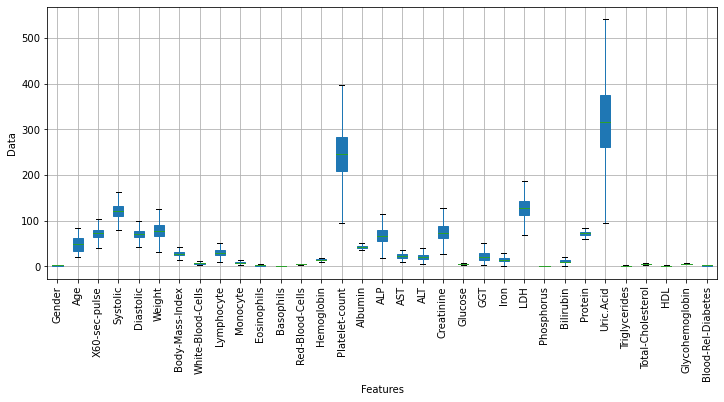

In [132]:
plt.subplots(figsize=(12,5))
X.boxplot(patch_artist=True, sym='k.')
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

# Normalizing data

In [133]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [134]:
S=StandardScaler()

In [135]:
X = S.fit_transform(X)

In [136]:
X.shape

(37079, 33)

In [137]:
L=LabelEncoder()

In [138]:
Y=L.fit_transform(Y)

In [139]:
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [140]:
Label=pd.DataFrame(Y)

In [141]:
Label.value_counts()

1    32227
0     4852
dtype: int64

# Spliting dataset into Training and Testing data

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [143]:
print(X_train.shape, Y_test.shape)
print(Y_train.shape, Y_test.shape)

(29663, 33) (7416,)
(29663,) (7416,)


# Logistic Regression Model

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
LR = LogisticRegression()

In [146]:
LR.fit(X_train, Y_train)

LogisticRegression()

In [147]:
Y_predict_train = LR.predict(X_train)

In [148]:
Y_predict=LR.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, classification_report

In [150]:
f1_score(Y_test,Y_predict,zero_division='warn',average='micro', sample_weight=None)

0.8828209277238402

<AxesSubplot:>

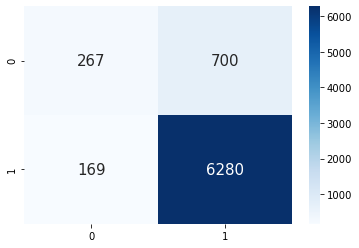

In [151]:
from sklearn.metrics import confusion_matrix
M=confusion_matrix(Y_test, Y_predict)
sns.heatmap(M,annot=True, fmt = 'd',cmap='Blues',annot_kws={'size' : 15})

In [152]:
print(classification_report(Y_test, Y_predict))
Accuracy_score = accuracy_score(Y_test, Y_predict)
Accuracy_score_train = accuracy_score(Y_train, Y_predict_train)
print('Accuracy of the model is', Accuracy_score) 
print('Accuracy of the model for train data is', Accuracy_score_train) 
print('Precision of the model is', precision_score(Y_test, Y_predict, average="micro"))
print('recall of the model is', recall_score(Y_test, Y_predict, average="micro"))

              precision    recall  f1-score   support

           0       0.61      0.28      0.38       967
           1       0.90      0.97      0.94      6449

    accuracy                           0.88      7416
   macro avg       0.76      0.62      0.66      7416
weighted avg       0.86      0.88      0.86      7416

Accuracy of the model is 0.8828209277238404
Accuracy of the model for train data is 0.8770185079054714
Precision of the model is 0.8828209277238404
recall of the model is 0.8828209277238404


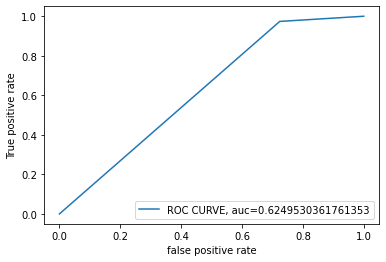

In [153]:
from sklearn.metrics import roc_curve
f, t, _ = roc_curve(Y_test, Y_predict)
auc = roc_auc_score(Y_test, Y_predict)
plt.plot(f,t,label="ROC CURVE, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.show()

# Support Vector Machine

In [154]:
from sklearn.svm import SVC

In [155]:
S=SVC()

In [156]:
S.fit(X_train, Y_train)

SVC()

In [163]:
Y_predict_train = S.predict(X_train)

In [164]:
Y_predict = S.predict(X_test)

In [165]:
f1_score(Y_test,Y_predict,zero_division='warn',average='micro', sample_weight=None)

0.8880798274002157

In [166]:
print(classification_report(Y_test, Y_predict))
Accuracy_score = accuracy_score(Y_test, Y_predict) 
Accuracy_score_train = accuracy_score(Y_train, Y_predict_train)
print('Accuracy of the model for train data is', Accuracy_score_train) 
print('Accuracy of the model is', Accuracy_score) 
print('Precision of the model is', precision_score(Y_test, Y_predict, average="micro"))
print('recall of the model is', recall_score(Y_test, Y_predict, average="micro"))

              precision    recall  f1-score   support

           0       0.72      0.23      0.35       967
           1       0.90      0.99      0.94      6449

    accuracy                           0.89      7416
   macro avg       0.81      0.61      0.65      7416
weighted avg       0.87      0.89      0.86      7416

Accuracy of the model for train data is 0.9066176718470822
Accuracy of the model is 0.8880798274002157
Precision of the model is 0.8880798274002157
recall of the model is 0.8880798274002157


<AxesSubplot:>

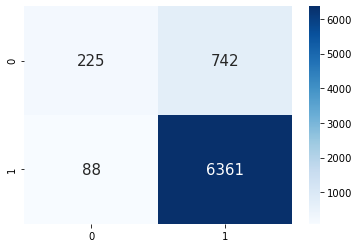

In [167]:
from sklearn.metrics import confusion_matrix
M=confusion_matrix(Y_test, Y_predict)
sns.heatmap(M,annot=True, fmt = 'd',cmap='Blues',annot_kws={'size' : 15})

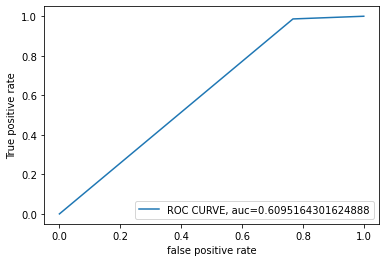

In [168]:
# from sklearn.metrics import roc_curve
f, t, _ = roc_curve(Y_test, Y_predict)
auc = roc_auc_score(Y_test, Y_predict)
plt.plot(f,t,label="ROC CURVE, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.show()

# Random Forest Model

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
RFC= RandomForestClassifier()

In [171]:
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [172]:
RFC.score(X_train, Y_train)

0.9999325759363517

In [173]:
Y_predict_train = RFC.predict(X_train)

In [174]:
Y_predict = RFC.predict(X_test)

In [175]:
RFC.score(X_test, Y_test)

0.9227346278317152

In [176]:
f1_score(Y_test,Y_predict,zero_division='warn',average='micro', sample_weight=None)

0.9227346278317153

In [177]:
print(classification_report(Y_test, Y_predict))
Accuracy_score = accuracy_score(Y_test, Y_predict) 
Accuracy_score_train = accuracy_score(Y_train, Y_predict_train)
print('Accuracy of the model for train data is', Accuracy_score_train) 
print('Accuracy of the model is', Accuracy_score) 
print('Precision of the model is', precision_score(Y_test, Y_predict, average="micro"))
print('recall of the model is', recall_score(Y_test, Y_predict, average="micro"))

              precision    recall  f1-score   support

           0       0.80      0.54      0.64       967
           1       0.93      0.98      0.96      6449

    accuracy                           0.92      7416
   macro avg       0.87      0.76      0.80      7416
weighted avg       0.92      0.92      0.92      7416

Accuracy of the model for train data is 0.9999325759363517
Accuracy of the model is 0.9227346278317152
Precision of the model is 0.9227346278317152
recall of the model is 0.9227346278317152


<AxesSubplot:>

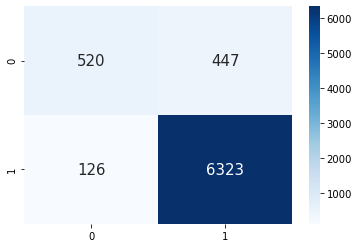

In [178]:
M=confusion_matrix(Y_test, Y_predict)
sns.heatmap(M,annot=True, fmt = 'd',cmap='Blues',annot_kws={'size' : 15})

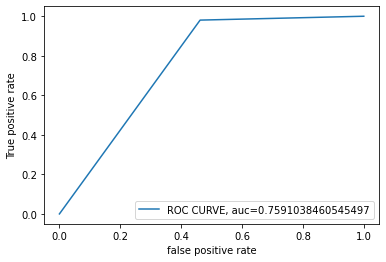

In [179]:
f, t, _ = roc_curve(Y_test, Y_predict)
auc = roc_auc_score(Y_test, Y_predict)
plt.plot(f,t,label="ROC CURVE, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.show()

# Applying K-fold cross validation to the Random Forest Model

In [180]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [181]:
scores = cross_val_score(RFC, X_train, Y_train, cv=10)

In [182]:
scores

array([0.91843613, 0.92854735, 0.92079542, 0.91807148, 0.91604855,
       0.9163857 , 0.92784895, 0.9163857 , 0.9238031 , 0.92110587])

In [183]:
print(np.mean(scores))

0.9207428260653658


In [184]:
Y_predict = cross_val_predict(RFC, X_test, Y_test)

In [185]:
Y_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [186]:
scores_test = cross_val_score(RFC, X_test, Y_test, cv=10)

In [187]:
scores_test

array([0.91778976, 0.92722372, 0.91374663, 0.90161725, 0.91778976,
       0.91374663, 0.90823212, 0.93117409, 0.92982456, 0.9217274 ])

In [188]:
print(np.mean(scores_test))

0.9182871911273104


In [189]:
f1_score(Y_test,Y_predict,zero_division='warn',average='micro', sample_weight=None)

0.9142394822006472

In [190]:
print(classification_report(Y_test, Y_predict))
Accuracy_score = accuracy_score(Y_test, Y_predict) 
print('Accuracy of the model is', Accuracy_score) 
print('Precision of the model is', precision_score(Y_test, Y_predict, average="micro"))
print('recall of the model is', recall_score(Y_test, Y_predict, average="micro"))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58       967
           1       0.92      0.98      0.95      6449

    accuracy                           0.91      7416
   macro avg       0.87      0.72      0.76      7416
weighted avg       0.91      0.91      0.90      7416

Accuracy of the model is 0.9142394822006472
Precision of the model is 0.9142394822006472
recall of the model is 0.9142394822006472


<AxesSubplot:>

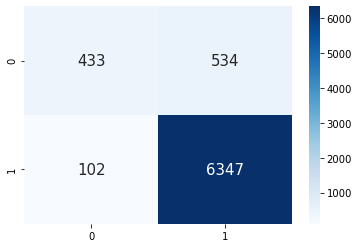

In [191]:
M=confusion_matrix(Y_test, Y_predict)
sns.heatmap(M,annot=True, fmt = 'd',cmap='Blues',annot_kws={'size' : 15})

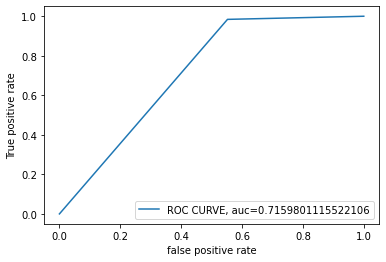

In [192]:
f, t, _ = roc_curve(Y_test, Y_predict)
auc = roc_auc_score(Y_test, Y_predict)
plt.plot(f,t,label="ROC CURVE, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.show()

# K Nearest Neighbors

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [195]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [196]:
Y_predict_train = classifier.predict(X_train)

In [197]:
Y_predict = classifier.predict(X_test)

In [198]:
f1_score(Y_test,Y_predict,zero_division='warn',average='micro', sample_weight=None)

0.8718985976267528

In [199]:
print(classification_report(Y_test, Y_predict))
Accuracy_score = accuracy_score(Y_test, Y_predict) 
Accuracy_score_train = accuracy_score(Y_train, Y_predict_train)
print('Accuracy of the model for train data is', Accuracy_score_train) 
print('Accuracy of the model is', Accuracy_score) 
print('Precision of the model is', precision_score(Y_test, Y_predict, average="micro"))
print('recall of the model is', recall_score(Y_test, Y_predict, average="micro"))

              precision    recall  f1-score   support

           0       0.52      0.19      0.28       967
           1       0.89      0.97      0.93      6449

    accuracy                           0.87      7416
   macro avg       0.71      0.58      0.61      7416
weighted avg       0.84      0.87      0.85      7416

Accuracy of the model for train data is 0.9019654114553484
Accuracy of the model is 0.8718985976267529
Precision of the model is 0.8718985976267529
recall of the model is 0.8718985976267529


<AxesSubplot:>

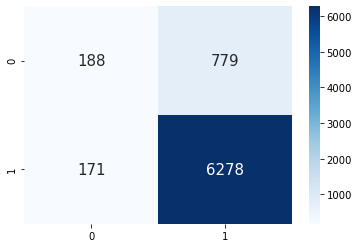

In [200]:
M=confusion_matrix(Y_test, Y_predict)
sns.heatmap(M,annot=True, fmt = 'd',cmap='Blues',annot_kws={'size' : 15})

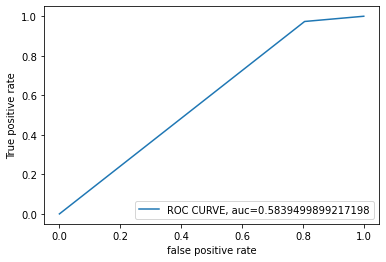

In [201]:
f, t, _ = roc_curve(Y_test, Y_predict)
auc = roc_auc_score(Y_test, Y_predict)
plt.plot(f,t,label="ROC CURVE, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.show()